> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.11 - Data Model

## Exercícios

#### Q1. `dataclass`
Exercício adaptado de [codechalleng.es/bites/154/](https://codechalleng.es/bites/154/) e [codechalleng.es/bites/320/](https://codechalleng.es/bites/320/).

Neste desafio, você deve escrever uma `dataclass` chamada `Bite` que gerencia 3 atributos: `number`, `title` e `level`. Seus tipos são:
* `number` - `int`, 
* `title` - `str`, 
* `level` -  classe `Enum` chamada `BiteLevel` com os atributos `Beginner`, `Intermediate`, `Advanced`. 

Exemplo de dado: `{'number': 154, 'title': 'Escreva uma dataclass', 'level': BiteLevel.Intermediate}`

As características dessa classe são:
* O atributo`level` tem um valor padrão `BiteLevel.Beginner`
* Uma coleção de objetos `Bite` tem que ser ordenável somente pelo atributo `number`
* Implemente o método especial `__str__` para imprimir o Bite na forma `f'{number} - {title} ({level})'`

Teste sua classe executando o seguinte código:
```python
bites = []
bites.append(Bite(154, 'Escreva uma dataclass', 'Intermediate'))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', 'Intermediate'))

for b in bites.sort(): print(b)
# Ordem esperada na saída:
# 1 - Some n valores (Beginner)
# 37 - Reescreva um loop com recursão (Intermediate)
# 154 - Escreva uma dataclass (Intermediate)
```

In [1]:
from enum import Enum
from dataclasses import dataclass

class BiteLevel(Enum):
    Beginner = 'Beginner'
    Intermediate = 'Intermediate'
    Advanced = 'Advanced'

@dataclass
class Bite:
    number: int
    title: str
    level: BiteLevel = BiteLevel.Beginner

    def __str__(self):
        return f'{self.number} - {self.title} ({self.level})'

bites = []
bites.append(Bite(154, 'Escreva uma dataclass', 'Intermediate'))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', 'Intermediate'))
bites.sort(key=lambda b: b.number)
for b in bites:
    print(b)

1 - Some n valores (BiteLevel.Beginner)
37 - Reescreva um loop com recursão (Intermediate)
154 - Escreva uma dataclass (Intermediate)


#### Q2. `Pydantic`
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Observe a seguinte lista de observações da previsão do tempo em Murmansk, Russia.
```python
data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]
```

Escreva um script que calcule e imprima a temperatura média (em Celsius) em Murmansk para as datas fornecidas. Em seu script, você deve incluir um modelo Pydantic que registre com sucesso todos os elementos dados. Note que:

* Algumas amostras estão faltando dados. Você deve decidir quando o atributo pode ter um valor padrão ou quando definí-lo como opcional (`typing.Optional`). 
* Você precisará implementar pelo menos um validador de campo para transformar atributos. Dica: teste primeiro quais vão falhar :)



In [2]:
from pydantic import BaseModel, field_validator
from typing import Optional

data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]

class MediaTemperatura(BaseModel):
    date : str
    temperature : float | int
    isCelsius : Optional[bool] = True
    airQualityIndex: Optional[int] = None

    @field_validator('temperature', mode='before')
    @classmethod
    def converter_temperatura(cls, value):
        return float(value)

    @field_validator('isCelsius', mode='before')
    @classmethod
    def converter_is_celsius(cls, value):
        if isinstance(value, str) and value.lower() == "not true":
            return False
        return bool(value)

    @field_validator('airQualityIndex', mode='before')
    @classmethod
    def converter_air_quality(cls, value):
        if value is None:
            return value
        return int(value)

    def retornar_temperatura_em_celsius(self):
        if self.isCelsius:
            return self.temperature
        else:
            return (self.temperature - 32) * 5.0/9.0
        
    
media = []
for sample in data_samples:
    instancia = MediaTemperatura(
        date=sample['date'],
        temperature=sample['temperature'],
        isCelsius=sample.get('isCelsius', True),
        airQualityIndex=sample.get('airQualityIndex', None)
    )
    media.append(instancia.retornar_temperatura_em_celsius())

if media:
    media = sum(media) / len(media)
    print(f'{media:.2f}°C')
else:
    print('Algo deu errado')

16.39°C


#### Q3
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Na célula a seguir, coletamos dados reais de uma das principais APIs de previsão do tempo, [open-meteo](https://open-meteo.com/en/docs). Não se preocupe em entender esse código, o mais importante é entender o resultado que ele retorna, ilustrado a seguir para uma coleta da temperatura dos últimos 15 dias em Itabira -MG. Caso deseje alterar a cidade de coleta, basta alimentar a latitude e longitude desejada, como nas opções a seguir.
* Itabira: `'latitude': -19.656655787605846, 'longitude': -43.228922960534476`
* Bom Despacho: `'latitude': -19.726308457732443, 'longitude': -45.27462803349767`

```python
{
  "latitude": -19.5,
  "longitude": -43.375,
  "generationtime_ms": 0.01800060272216797,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 2.0,
  "hourly_units": {
    "time": "iso8601",
    "temperature_2m": "\u00b0C"
  },
  "hourly": {
    "time": [
      "2024-07-19T00:00",
      "2024-07-19T01:00",
      "2024-07-19T02:00",
      ...
    ],
    "temperature_2m": [
      21.9,
      20.9,
      20.0,
      ... 
    ]
  }
}
```

Você deve escrever um modelo Pydantic `OpenMeteo` que receba diretamente a resposta dessa API, através do comando:
```python
dados = OpenMeteo(**response)
``` 

Para comportar a estrutura hierárquica desse dicionário (é um dicionário com alguns dicionários internos), você deve criar uma classe Pydantic para cada dicionário interno (`HourlyUnits` e `Hourly`), com seus respectivos atributos. Essas classes serão atributos da classe principal `OpenMeteo`, que terá também os outros atributos da resposta (`latitude`, `longitude`, etc.).



In [3]:
import requests, json

url = 'https://api.open-meteo.com/v1/forecast'
lat, long = -19.656655787605846, -43.228922960534476
params = {'latitude': lat, 'longitude': long, 'elevation': 2,
          'hourly': 'temperature_2m', 'forecast_days': 15}
response = requests.get(url, params=params).json()
print(json.dumps(response, indent=2))

{
  "latitude": -19.5,
  "longitude": -43.375,
  "generationtime_ms": 0.029921531677246094,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 2.0,
  "hourly_units": {
    "time": "iso8601",
    "temperature_2m": "\u00b0C"
  },
  "hourly": {
    "time": [
      "2025-01-30T00:00",
      "2025-01-30T01:00",
      "2025-01-30T02:00",
      "2025-01-30T03:00",
      "2025-01-30T04:00",
      "2025-01-30T05:00",
      "2025-01-30T06:00",
      "2025-01-30T07:00",
      "2025-01-30T08:00",
      "2025-01-30T09:00",
      "2025-01-30T10:00",
      "2025-01-30T11:00",
      "2025-01-30T12:00",
      "2025-01-30T13:00",
      "2025-01-30T14:00",
      "2025-01-30T15:00",
      "2025-01-30T16:00",
      "2025-01-30T17:00",
      "2025-01-30T18:00",
      "2025-01-30T19:00",
      "2025-01-30T20:00",
      "2025-01-30T21:00",
      "2025-01-30T22:00",
      "2025-01-30T23:00",
      "2025-01-31T00:00",
      "2025-01-31T01:00",
      "2025-01-31T02:0

In [4]:
from pydantic import BaseModel

class Hourly_units(BaseModel):
    time: str
    temperature_2m: str

class Hourly(BaseModel):
    time: list[str]
    temperature_2m: list[float]

class OpenMeteo(BaseModel):
    latitude: float
    longitude: float
    generationtime_ms: float
    utc_offset_seconds: int
    timezone: str
    timezone_abbreviation: str
    elevation: float
    hourly_units: Hourly_units
    hourly: Hourly


dados = OpenMeteo(**response)

for dado in dados:
    print(dado)

('latitude', -19.5)
('longitude', -43.375)
('generationtime_ms', 0.029921531677246094)
('utc_offset_seconds', 0)
('timezone', 'GMT')
('timezone_abbreviation', 'GMT')
('elevation', 2.0)
('hourly_units', Hourly_units(time='iso8601', temperature_2m='°C'))
('hourly', Hourly(time=['2025-01-30T00:00', '2025-01-30T01:00', '2025-01-30T02:00', '2025-01-30T03:00', '2025-01-30T04:00', '2025-01-30T05:00', '2025-01-30T06:00', '2025-01-30T07:00', '2025-01-30T08:00', '2025-01-30T09:00', '2025-01-30T10:00', '2025-01-30T11:00', '2025-01-30T12:00', '2025-01-30T13:00', '2025-01-30T14:00', '2025-01-30T15:00', '2025-01-30T16:00', '2025-01-30T17:00', '2025-01-30T18:00', '2025-01-30T19:00', '2025-01-30T20:00', '2025-01-30T21:00', '2025-01-30T22:00', '2025-01-30T23:00', '2025-01-31T00:00', '2025-01-31T01:00', '2025-01-31T02:00', '2025-01-31T03:00', '2025-01-31T04:00', '2025-01-31T05:00', '2025-01-31T06:00', '2025-01-31T07:00', '2025-01-31T08:00', '2025-01-31T09:00', '2025-01-31T10:00', '2025-01-31T11:00', '20

#### Q4. 

Com os dados carregados na questão anterior plote um gráfico de linha, com a biblioteca de sua preferência, onde o eixo `x` são os timestamps (data e hora) e o eixo `y` é a temperatura medida.

{'latitude': -19.5, 'longitude': -43.375, 'generationtime_ms': 0.029921531677246094, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 2.0, 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C'}, 'hourly': {'time': ['2025-01-30T00:00', '2025-01-30T01:00', '2025-01-30T02:00', '2025-01-30T03:00', '2025-01-30T04:00', '2025-01-30T05:00', '2025-01-30T06:00', '2025-01-30T07:00', '2025-01-30T08:00', '2025-01-30T09:00', '2025-01-30T10:00', '2025-01-30T11:00', '2025-01-30T12:00', '2025-01-30T13:00', '2025-01-30T14:00', '2025-01-30T15:00', '2025-01-30T16:00', '2025-01-30T17:00', '2025-01-30T18:00', '2025-01-30T19:00', '2025-01-30T20:00', '2025-01-30T21:00', '2025-01-30T22:00', '2025-01-30T23:00', '2025-01-31T00:00', '2025-01-31T01:00', '2025-01-31T02:00', '2025-01-31T03:00', '2025-01-31T04:00', '2025-01-31T05:00', '2025-01-31T06:00', '2025-01-31T07:00', '2025-01-31T08:00', '2025-01-31T09:00', '2025-01-31T10:00', '2025-01-31T11:00', '2025-01-31T12:00', 

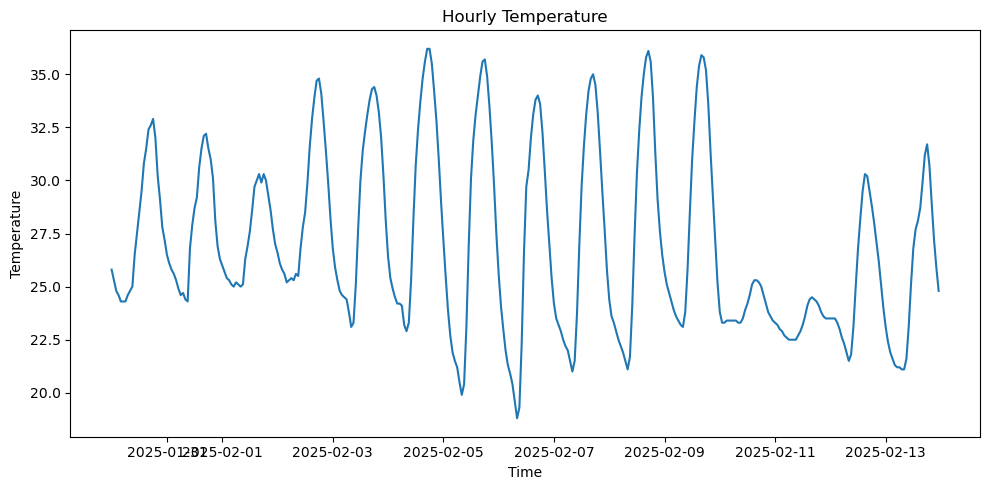

In [7]:
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

dados = OpenMeteo(**response) #To reset dados
dados = dados.model_dump()

print(dados)

x = dados['hourly']['time']
y = dados['hourly']['temperature_2m']

#if i don't use this, a lot of dates are inserted in the graphic, making impossible to undertand
x = [datetime.fromisoformat(t) for t in x]

plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Hourly Temperature')
plt.tight_layout()